## Lyrics sentiment analysis_전처리한 ver2 = 중간발표

In [1]:
with open('hoseung3.txt', encoding='utf-8') as f:
    ex1a = f.read()
    print(ex1a)

Here's to the ones that we got
Cheers to the wish you were here, but you're not
Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
Cause the drinks bring back all the memories
And the memories bring back, memories bring back you
There's a time that I remember, when I did not know no pain
When I believed in forever, and everything would stay the same
Now my heart feel like December when somebody say your name
Cause I can't reach out to call you, but I know I will one day, yeah
Everybody hurts sometimes
Everybody hurts someday, ayy ayy
But everything gon' be alright
Go and raise a glass and say, ayy
Here's to the ones that we got
Cheers to the wish you were here, but you're not
Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
Cause the drinks bring back all the memories
And the memories bring 

In [2]:
ex1 = ex1a.split("\n")
ex1

["Here's to the ones that we got",
 "Cheers to the wish you were here, but you're not",
 'Cause the drinks bring back all the memories',
 "Of everything we've been through",
 'Toast to the ones here today',
 'Toast to the ones that we lost on the way',
 'Cause the drinks bring back all the memories',
 'And the memories bring back, memories bring back you',
 "There's a time that I remember, when I did not know no pain",
 'When I believed in forever, and everything would stay the same',
 'Now my heart feel like December when somebody say your name',
 "Cause I can't reach out to call you, but I know I will one day, yeah",
 'Everybody hurts sometimes',
 'Everybody hurts someday, ayy ayy',
 "But everything gon' be alright",
 'Go and raise a glass and say, ayy',
 "Here's to the ones that we got",
 "Cheers to the wish you were here, but you're not",
 'Cause the drinks bring back all the memories',
 "Of everything we've been through",
 'Toast to the ones here today',
 'Toast to the ones that w

In [3]:
import pandas as pd
import numpy as np 

In [4]:
from transformers import pipeline
classifier1 = pipeline('sentiment-analysis') # classifier1 : 긍정부정 분석
pd.DataFrame(classifier1(ex1a), index=['Memories']) # ex1a : 전체

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
Memories,POSITIVE,0.980136


In [5]:
c1 = pd.DataFrame(classifier1(ex1)) # ex1 : 문장
df = pd.DataFrame(ex1,columns=['lyrics']).join(c1) 
df

,lyrics,label,score
0,Here's to the ones that we got,POSITIVE,0.646131
1,"Cheers to the wish you were here, but you're not",NEGATIVE,0.808114
2,Cause the drinks bring back all the memories,POSITIVE,0.999241
3,Of everything we've been through,POSITIVE,0.932488
4,Toast to the ones here today,POSITIVE,0.999426
5,Toast to the ones that we lost on the way,POSITIVE,0.998790
6,Cause the drinks bring back all the memories,POSITIVE,0.999241
7,"And the memories bring back, memories bring ba...",POSITIVE,0.999635
8,"There's a time that I remember, when I did not...",POSITIVE,0.991207
9,"When I believed in forever, and everything wou...",POSITIVE,0.989717


In [12]:
pd.DataFrame(classifier(ex1a), index=['Memories']) # 문장전체 중 음성어부분 제거안하면 에러발생

,label,score
Memories,sadness,0.678472


In [13]:
# huggingface emotion : classifier 감정분석
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
c2 = pd.DataFrame(classifier(ex1))
df2 = pd.DataFrame(ex1,columns=['lyrics']).join(c2)
df2

,lyrics,label,score
0,Here's to the ones that we got,neutral,0.968069
1,"Cheers to the wish you were here, but you're not",neutral,0.863504
2,Cause the drinks bring back all the memories,neutral,0.513079
3,Of everything we've been through,sadness,0.874718
4,Toast to the ones here today,neutral,0.962840
5,Toast to the ones that we lost on the way,neutral,0.931030
6,Cause the drinks bring back all the memories,neutral,0.513079
7,"And the memories bring back, memories bring ba...",joy,0.755757
8,"There's a time that I remember, when I did not...",neutral,0.573523
9,"When I believed in forever, and everything wou...",joy,0.475780


In [14]:
a = df['label'].value_counts()
b = df.groupby('label').mean()
pd.DataFrame(a).join(b)

,label,score
POSITIVE,35,0.945634
NEGATIVE,8,0.924964


In [15]:
a = df2['label'].value_counts()
b = df2.groupby('label').mean()
pd.DataFrame(a).join(b)

,label,score
neutral,26,0.787435
sadness,9,0.804458
joy,7,0.639890
anger,1,0.875724


## wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import nltk
stopwords = nltk.corpus.stopwords.words('english') 
newStopWords = ['verse','bridge','guitar','solo','instrumental','intro',
                'im','get','youre','youve','gotta',"we've","gon'","I'll","can't",
                "yo","yeah",'ayy','ooh','oh','ya','doo','doo doo'] 
stopwords.extend(newStopWords) 

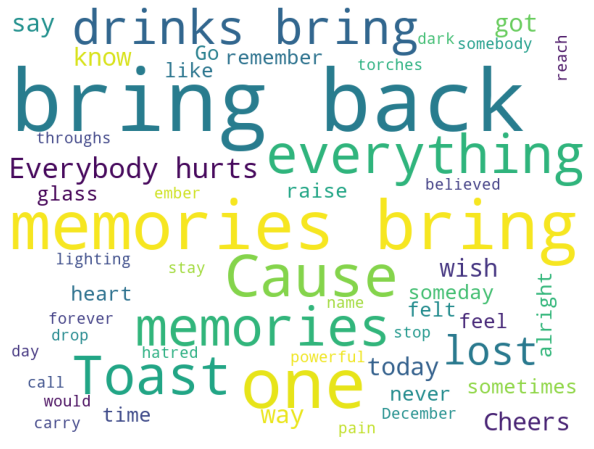

In [22]:
wordcloud = WordCloud(stopwords = stopwords,
                      background_color = 'White', #배경색
                      width = 800,
                      height = 600).generate(' '.join(ex1))

plt.figure(figsize = (12, 8)) # 각각 가로 세로 인치 입니다.
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션
plt.imshow(wordcloud) # 이미지가 표시되도록 하는 옵션. 
plt.show() # 최종으로 보여주는 옵션. 

In [19]:
# keyword 중복제거하는법?